In [64]:
# https://www.youtube.com/watch?v=AQk0XpVTMIw

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [65]:
# Seaborndaki hazir veri setlerini gorelim;

dataset_names = sns.get_dataset_names()

for dataset_name in dataset_names:
    print(dataset_name)

anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic


In [66]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Gereksiz sutunlari dusurelim


In [68]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [70]:
df.groupby("species").agg(["min", "max", "std", "mean"])

sepal_length                       sepal_width                 \
                    min  max       std   mean         min  max       std   
species                                                                    
setosa              4.3  5.8  0.352490  5.006         2.3  4.4  0.379064   
versicolor          4.9  7.0  0.516171  5.936         2.0  3.4  0.313798   
virginica           4.9  7.9  0.635880  6.588         2.2  3.8  0.322497   

                  petal_length                       petal_width       \
             mean          min  max       std   mean         min  max   
species                                                                 
setosa      3.428          1.0  1.9  0.173664  1.462         0.1  0.6   
versicolor  2.770          3.0  5.1  0.469911  4.260         1.0  1.8   
virginica   2.974          4.5  6.9  0.551895  5.552         1.4  2.5   

                             
                 std   mean  
species                      
setosa      0.105386  0.246  
versicolor  0.197753  1.326  
virginica   0.274650  2.026

In [71]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [72]:
#Bos satirlari mean ile doldurduk.

for column in df.columns[:-1]:
    df[column].fillna(value=df[column].mean(), inplace=True)

In [73]:
df.dropna(axis=0, how="any", inplace=True) # 1 tane bile bos eleman varsa o satiri dusur dedik.

## Verilerin gorsellestirilmesi

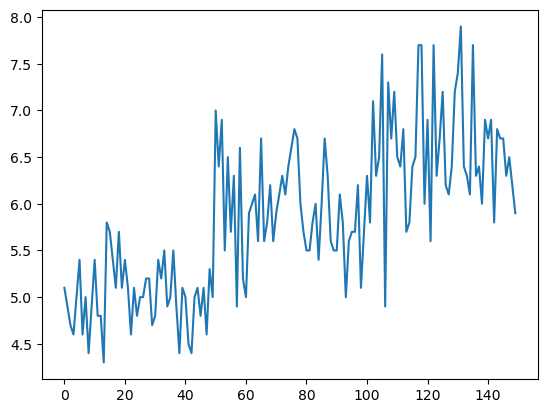

In [74]:
df["sepal_length"].plot();

In [75]:
df.reset_index() # indexe isim verdim

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica


In [76]:
df["id"]=df.index  # index sutununu id olarak isimlendirdim ki grafikte kullanabileyim.

In [77]:
df["id"]

0        0
1        1
2        2
3        3
4        4
      ... 
145    145
146    146
147    147
148    148
149    149
Name: id, Length: 150, dtype: int64

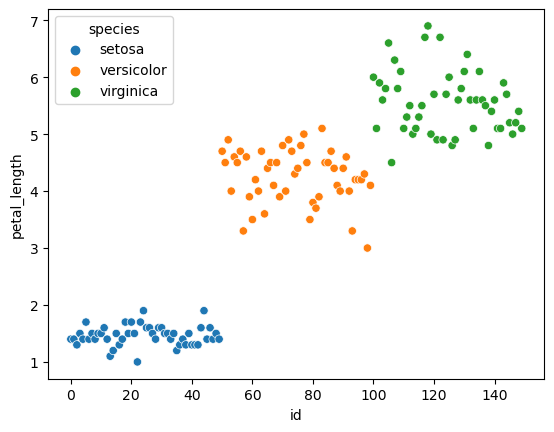

In [78]:
sns.scatterplot(data=df, x="id", y="petal_length", hue="species");

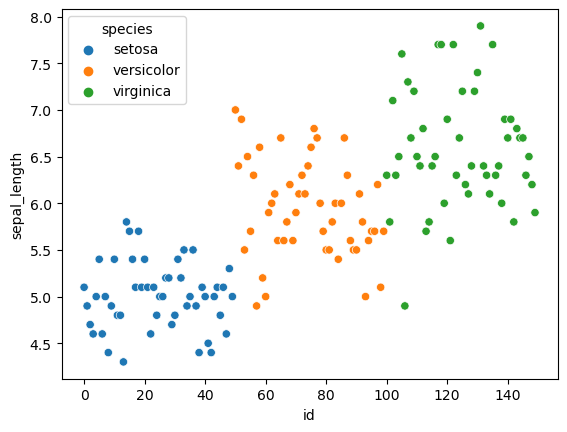

In [79]:
sns.scatterplot(data=df, x="id", y="sepal_length", hue="species");

In [80]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'id'],
      dtype='object')

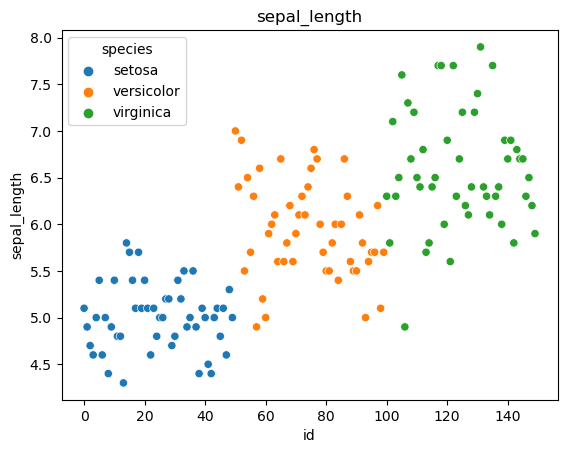

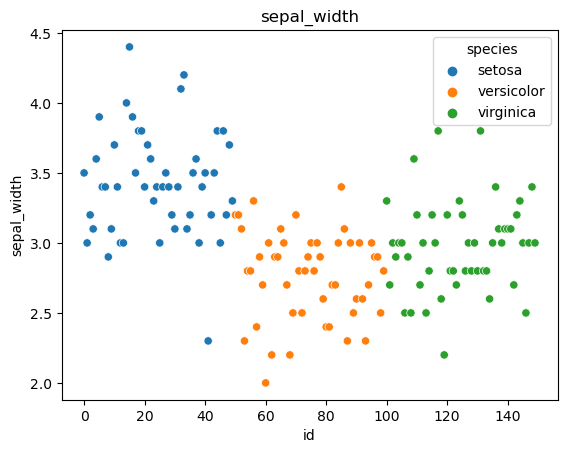

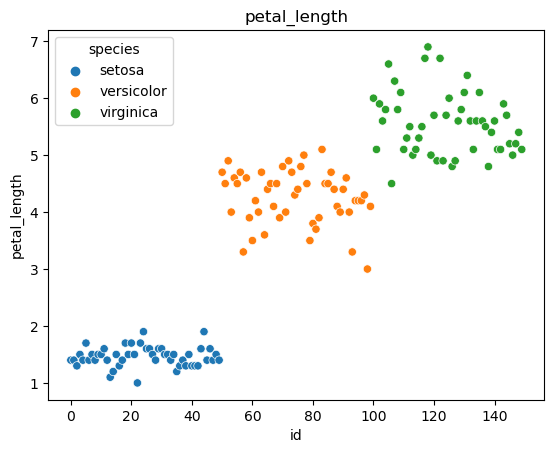

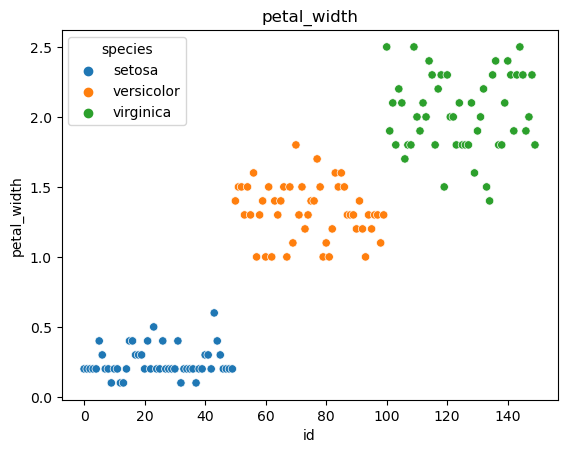

In [81]:
# Bu grafikleri for loop ile cizmek:

for column in df.columns[:-2]:
    sns.scatterplot(data=df, x="id", y=column, hue="species")
    plt.title(column)
    plt.show()


## Outlier Detection 

### 3 Sigma (Standart Sapma) Kurali

3 std sapmalik araigin disinda kalanlari outlier olarak kabul edebiliyoruz.


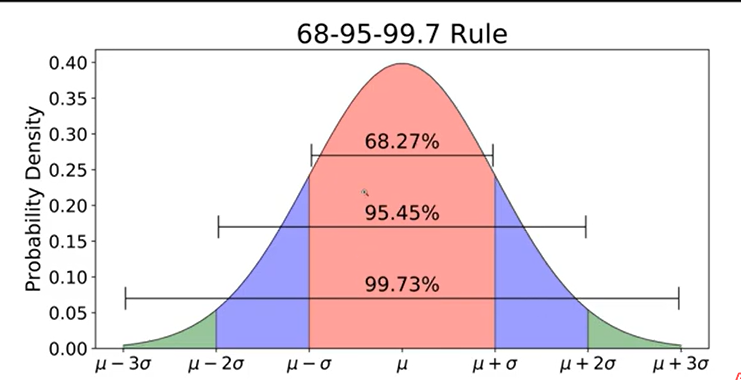

In [82]:
df[df["species"] == "setosa"]   # setosa turune ait bilgileri getir

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,3
4,5.0,3.6,1.4,0.2,setosa,4
5,5.4,3.9,1.7,0.4,setosa,5
6,4.6,3.4,1.4,0.3,setosa,6
7,5.0,3.4,1.5,0.2,setosa,7
8,4.4,2.9,1.4,0.2,setosa,8
9,4.9,3.1,1.5,0.1,setosa,9


In [83]:
selected_spec = df[df["species"] == "setosa"]
selected_spec

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,3
4,5.0,3.6,1.4,0.2,setosa,4
5,5.4,3.9,1.7,0.4,setosa,5
6,4.6,3.4,1.4,0.3,setosa,6
7,5.0,3.4,1.5,0.2,setosa,7
8,4.4,2.9,1.4,0.2,setosa,8
9,4.9,3.1,1.5,0.1,setosa,9


In [84]:
selected_column = selected_spec["sepal_length"] # selected_spec  bu df den "sepal_length" sutununu sec
selected_column 

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

In [85]:
# bu sutunun avg ve std alalim.

avg = selected_column.mean()
avg

5.006

In [86]:
std = selected_column.std()
std

0.3524896872134512

In [87]:
three_sigma_plus = avg + (3*std)
three_sigma_plus

6.063469061640354

In [88]:
three_sigma_minus = avg - (3*std)
three_sigma_minus

3.9485309383596467

In [89]:
selected_column[((selected_spec["sepal_length"] > three_sigma_plus) | (selected_spec["sepal_length"] < three_sigma_minus))].index

Int64Index([], dtype='int64')

In [91]:
# Buraya kadar 3-sigma kuralona gore outlier olup olmadigini inceledik ve olmadigini gorduk. Bu incelemeyi diger coulumns icin bir dongu ile yapalim.
# For loop;

for column in df.columns[:-2]:
    for spec in df["species"].unique():
        selected_spec = df[df["species"] == spec]
        selected_column = selected_spec[column]  

        
        std = selected_column.std()
        avg = selected_column.mean()
        
        

        three_sigma_plus = avg + (3*std)
        three_sigma_minus = avg - (3*std)
        
        outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        df.drop(index = outliers, inplace = True)
       
        print(column, spec, outliers)


sepal_length setosa Int64Index([], dtype='int64')
sepal_length versicolor Int64Index([], dtype='int64')
sepal_length virginica Int64Index([], dtype='int64')
sepal_width setosa Int64Index([], dtype='int64')
sepal_width versicolor Int64Index([], dtype='int64')
sepal_width virginica Int64Index([], dtype='int64')
petal_length setosa Int64Index([], dtype='int64')
petal_length versicolor Int64Index([], dtype='int64')
petal_length virginica Int64Index([], dtype='int64')
petal_width setosa Int64Index([], dtype='int64')
petal_width versicolor Int64Index([], dtype='int64')
petal_width virginica Int64Index([], dtype='int64')


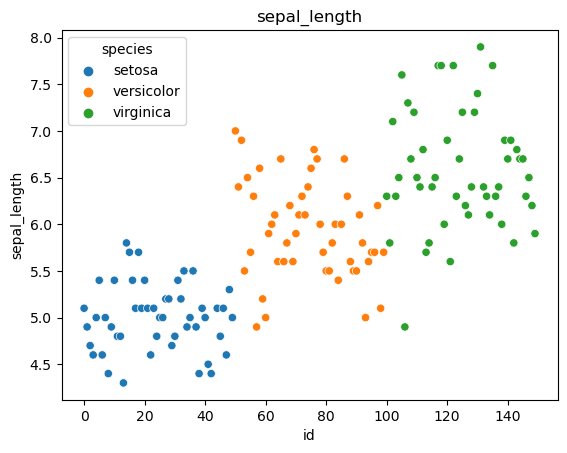

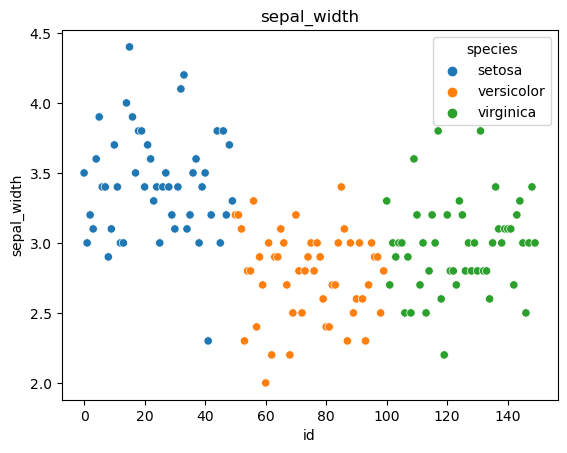

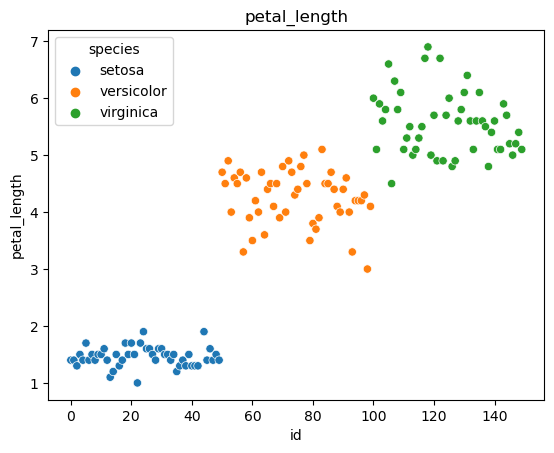

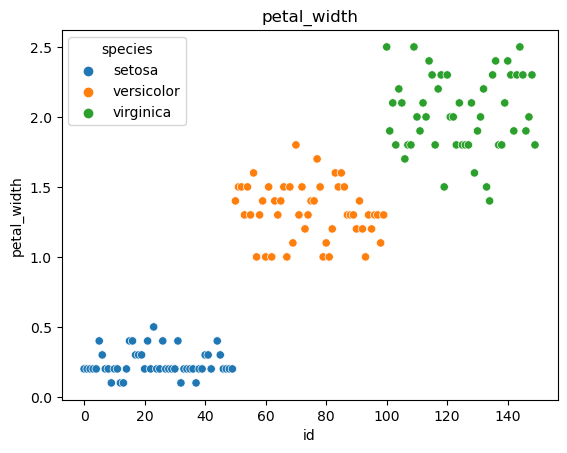

In [92]:
# petal_width setosa index = 43`te outlier vardi, bakalim gitmis mi?

for column in df.columns[:-2]:
    sns.scatterplot(data=df, x="id", y=column, hue="species")
    plt.title(column)
    plt.show()

## IQR ile Outlier Handling


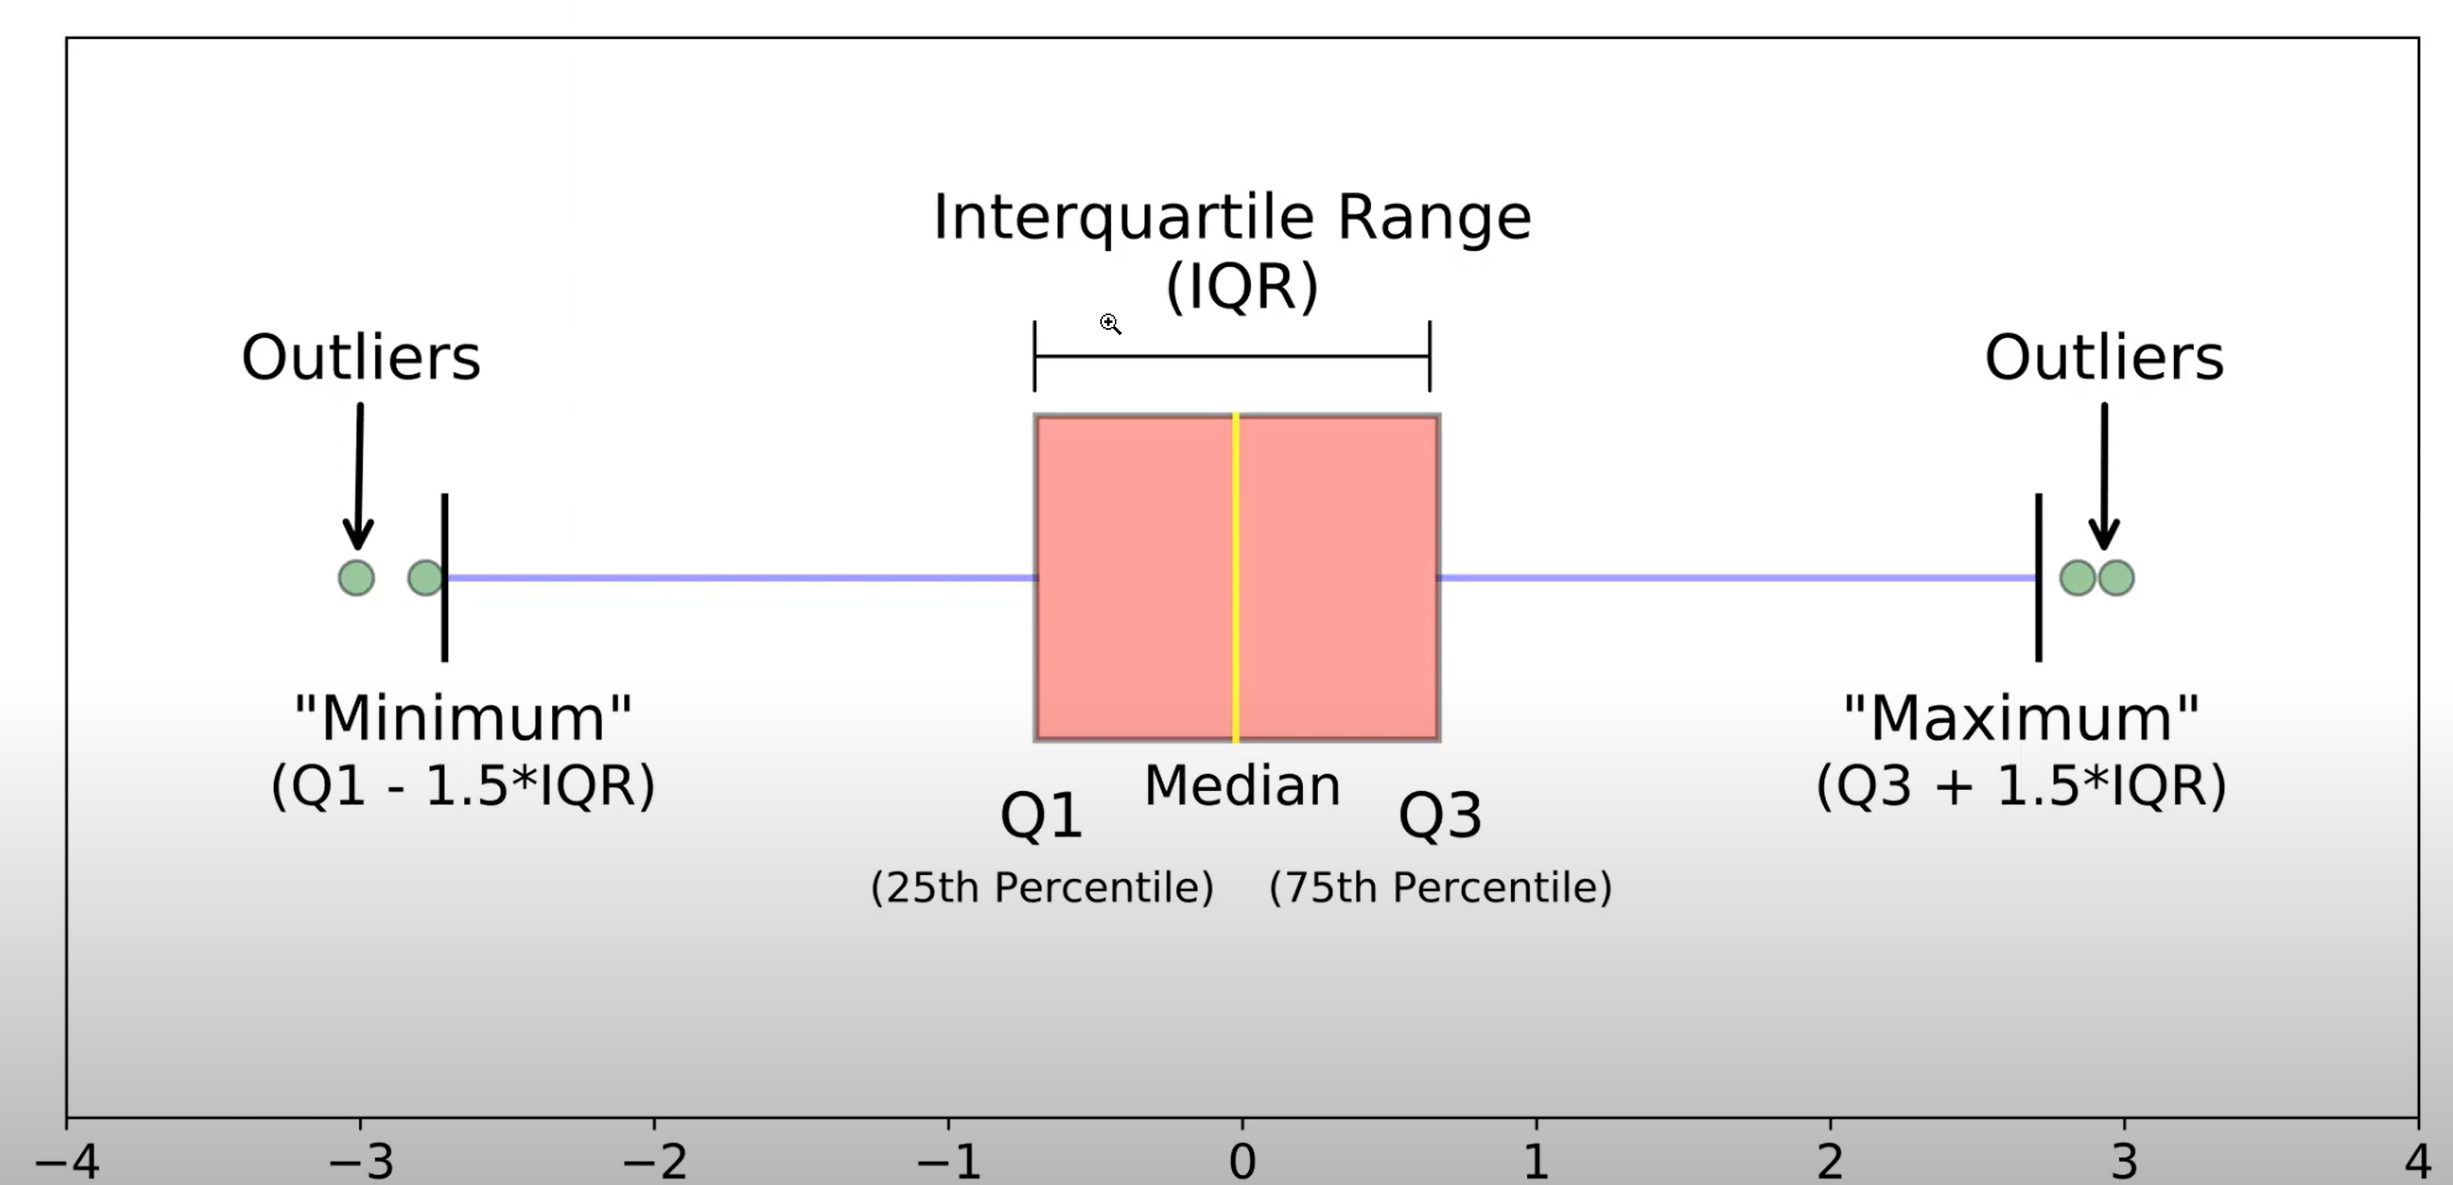

In [114]:
for column in df.columns[:-2]:
    for spec in df["species"].unique():
        selected_spec = df[df["species"] == spec]
        selected_column = selected_spec[column] 
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        
        
        iqr = q3 - q1
        
        lower_bound = q1 - (1.5 * iqr) 
        upper_bound = q3 + (1.5 * iqr)
        
        #print(column, spec, "| altsinir =", lower_bound, " ; ustsinir = ",  upper_bound)
        
        
        max_indxs = df[ (df["species"] == spec) & (df[column] > upper_bound)].index
        print(column, spec, "max_indxs: ", max_indxs)
        
        min_indxs = df[ (df["species"] == spec) & (df[column] < lower_bound)].index
        print(column, spec, "min_indxs: ", min_indxs)
    
        df.drop(index = max_indxs, inplace = True)
        df.drop(index = min_indxs, inplace = True)
        

sepal_length setosa max_indxs:  Int64Index([], dtype='int64')
sepal_length setosa min_indxs:  Int64Index([], dtype='int64')
sepal_length versicolor max_indxs:  Int64Index([], dtype='int64')
sepal_length versicolor min_indxs:  Int64Index([], dtype='int64')
sepal_length virginica max_indxs:  Int64Index([], dtype='int64')
sepal_length virginica min_indxs:  Int64Index([106], dtype='int64')
sepal_width setosa max_indxs:  Int64Index([], dtype='int64')
sepal_width setosa min_indxs:  Int64Index([41], dtype='int64')
sepal_width versicolor max_indxs:  Int64Index([], dtype='int64')
sepal_width versicolor min_indxs:  Int64Index([], dtype='int64')
sepal_width virginica max_indxs:  Int64Index([], dtype='int64')
sepal_width virginica min_indxs:  Int64Index([], dtype='int64')
petal_length setosa max_indxs:  Int64Index([24, 44], dtype='int64')
petal_length setosa min_indxs:  Int64Index([13, 14, 22, 35], dtype='int64')
petal_length versicolor max_indxs:  Int64Index([], dtype='int64')
petal_length versic

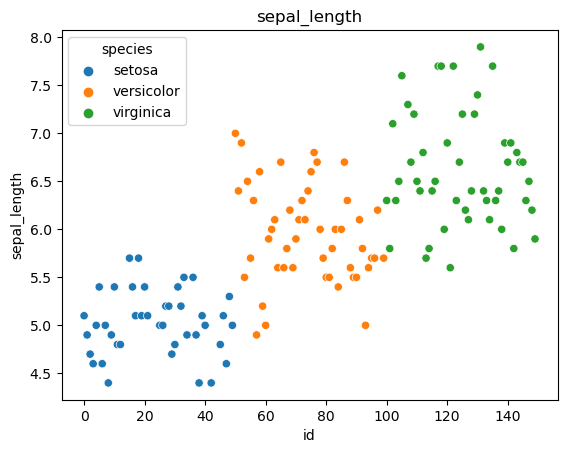

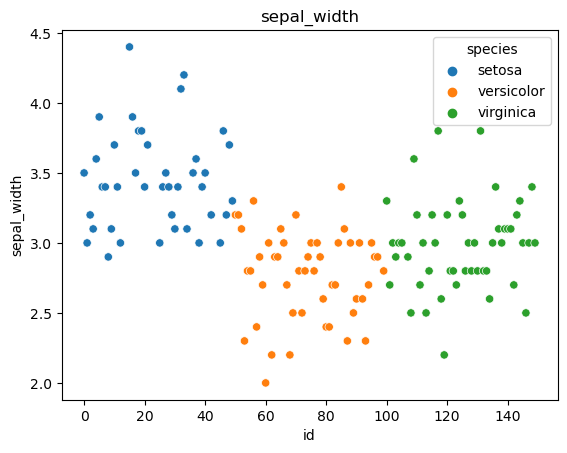

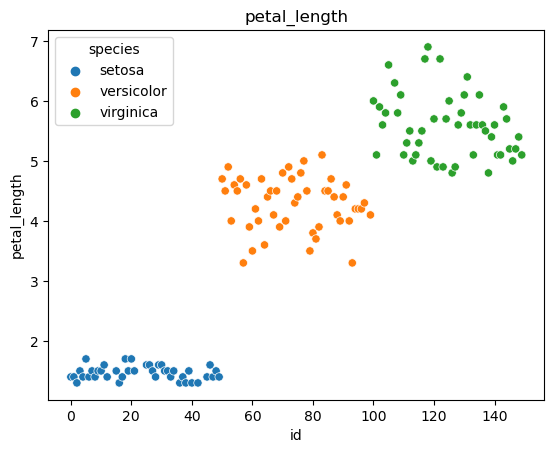

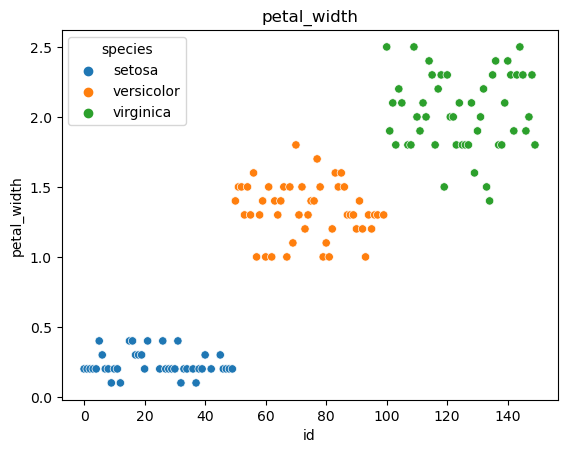

In [115]:
# petal_width setosa max index = 43`te outlier vardi, bakalim gitmis mi?

for column in df.columns[:-2]:
    sns.scatterplot(data=df, x="id", y=column, hue="species")
    plt.title(column)
    plt.show()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  139 non-null    float64
 1   sepal_width   139 non-null    float64
 2   petal_length  139 non-null    float64
 3   petal_width   139 non-null    float64
 4   species       139 non-null    object 
 5   id            139 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.6+ KB


In [117]:
df.shape

(139, 6)

In [118]:
# Artik data seti ile ilgili on hazirliklar bitti, analize gececegiz. Bu noktada veri setinin son halini kaydedebiliriz.

df.to_csv("final_data.csv")

In [122]:
# Ben bu df  i bir de df_final`e atamak istiyorum;

df_final = df.copy()

In [123]:
df_final.shape

(139, 6)

# ML Asamasi

In [6]:
# My denemeler.....
# Bu kod, 0 ile 1 arasında uniform bir dağılıma sahip rastgele bir sayı elde edecektir. 
import random

random_number = random.uniform(0, 1)
random_number 

0.8713842689783852

In [16]:
!pip install scipy
import scipy.stats as stats


stats.poisson.pmf(7, 5) 

0.10444486295705395

In [17]:
import scipy.stats as stats

# Ortalama ve standart sapma değerleri
mu = 0  # Ortalama
sigma = 1  # Standart sapma

# Normal dağılımı modelleme
normal_dist = stats.norm(mu, sigma)

# Örnek işlemler
x = 1.5  # Değer
pdf_value = normal_dist.pdf(x)  # PDF hesaplama
cdf_value = normal_dist.cdf(x)  # CDF hesaplama
ppf_value = normal_dist.ppf(0.95)  # PPF hesaplama

print("PDF:", pdf_value)
print("CDF:", cdf_value)
print("PPF:", ppf_value)

PDF: 0.12951759566589174
CDF: 0.9331927987311419
PPF: 1.6448536269514722


In [32]:
import scipy.stats as stats

# Standart normal dağılımı oluştur
normal_dist = stats.norm(loc=0, scale=1)

# Örnek olarak standart normal dağılımdan rastgele bir değer al
random_value = normal_dist.rvs()
print("random_value :", random_value)

# Belirli bir değerin (ORn 2 gelme) olasılığını hesapla;
probability = normal_dist.pdf(2)
print("probability: ", probability)

# Belirli bir değerin kümülatif olasılığını hesapla;
cumulative_probability = normal_dist.cdf(0.3)
print("cumulative_probability: ", cumulative_probability)

# Belirli bir olasılığın tersini hesapla
inverse_cumulative_probability = normal_dist.ppf(0.95)
print("inverse_cumulative_probability: ", inverse_cumulative_probability)

random_value : 0.5848398066383068
probability:  0.05399096651318806
cumulative_probability:  0.6179114221889526
inverse_cumulative_probability:  1.6448536269514722


In [40]:
from scipy import stats

# Örneklem veri
sample = [1, 2, 3, 4, 5]

# Null hipotez değeri (popülasyon ortalaması)
null_value = 3

# Tek yönlü t testi
t_statistic, p_value = stats.ttest_1samp(sample, null_value)
t_statistic, p_value


(0.0, 1.0)